# Data Science and Business Analytics intern at The Sparks Foundation

# Task 1 :-> Prediction using Supervised ML

### Predict the percentage of an student based on the no. of study hours.


# Linear Regression:->
Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be independent variable, and the other is considered to be a dependent variable.

### Importing libraries

In [27]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

### Reading Dataset

In [28]:
# Reading the Data 
data = pd.read_csv('http://bit.ly/w-data')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [30]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [31]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [32]:
pd.DataFrame(data)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Data visualization

Data visualization basically refers to the graphical representation 

### Plotting Scatter plot of Hours vs Scores

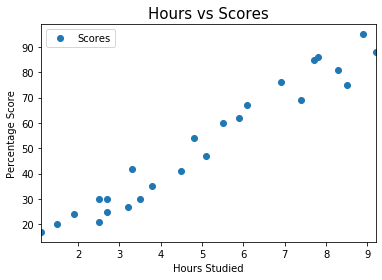

In [33]:
#plotting scatter plot of given dataset
data.plot(x='Hours',y='Scores',style='o')
plt.title('Hours vs Scores', size=15)  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

### diving the dataset into feature independent variable and dependent variable 


In [34]:
#diving the dataset into feature independent variable and dependent variable 
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [35]:
print(data.shape)

(25, 2)


### Spliting the dataset into Training and Testing Data 

In [36]:
#split the data in to testing and training
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0) 

In [37]:
x_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [38]:
x_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

### Building Model

In [39]:
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

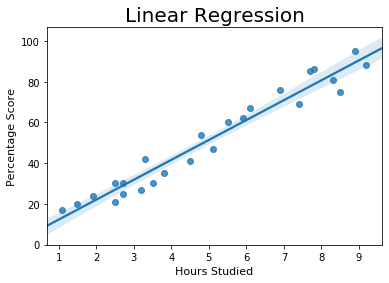

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [40]:
sns.regplot(x=data['Hours'],y=data['Scores'])
plt.title('Linear Regression', size=20)  
plt.xlabel('Hours Studied', size=11)  
plt.ylabel('Percentage Score', size=11)  
plt.show()
print(data.corr())

In [41]:
print(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


## Predictions



In [42]:
pred_x=regressor.predict(x_train)
pred_y=regressor.predict(x_test)


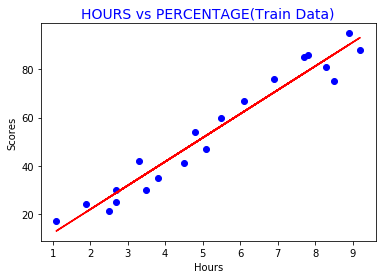

In [51]:
# plotting for train data
plt.scatter(x_train,y_train,color='blue')
plt.plot(x_train,pred_x,color='red')
plt.title("HOURS vs PERCENTAGE(Train Data)",color="Blue",fontsize="14")
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

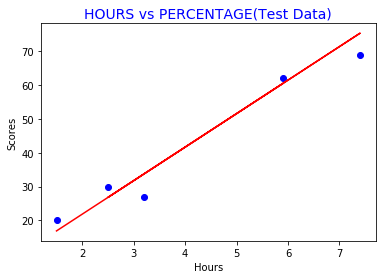

In [52]:
# plotting for test data
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_test,pred_y,color='red')
plt.title("HOURS vs PERCENTAGE(Test Data)",color="Blue",fontsize="14")
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [45]:
prediction = pd.DataFrame({'Given scores': y_test, 'Predicted scores': pred_y})    
prediction

,Given scores,Predicted scores
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#### What will be predicted score if a student studies for 9.25 hrs/ day?

In [23]:
#predicting score of the student if he/she study for 9.25 hr/day
hrs=[9.25]
result=regressor.predict([hrs])
print(result)
print("If a student studies {} hrs/day, the predicted score will be {}".format(hrs,result[0]))

[93.69173249]
If a student studies [9.25] hrs/day, the predicted score will be 93.69173248737538


In [24]:
## For checking the Accuracy of the model use of r2_score() method. 
r2 = r2_score(y_test,pred_y)
r2*100

94.54906892105356

In [141]:
print('Mean Absolute Error {}'.format(mean_absolute_error(y_test,pred_y)))


Mean Absolute Error 4.183859899002975
